in here we will be building an alarm system/motion detection based off of these three videos. the plan is to make an alarm system that captures the frame where the motion was detected mostly all the frames containing motion detection

we are first going to import 
cv2 for webcam image handling
imutils for cropping resizing
threading to handle multiple frames
winsound for alarm system

In [36]:
import cv2
import imutils
import threading
import winsound

we then setup the webcamfeed variable, height and width

In [37]:
cap = cv2.VideoCapture(1)

cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)


True

we will get a frame and an immediate netxt frame. if there is enough differences between the frame we will sound the allarm
so, we define a start frame, set its width to 500, convert the frame wo grayscale to view changes, then we use a gausian blur on the image to check for deviation

In [38]:
ret, start_frame = cap.read()
start_frame = imutils.resize(start_frame, width=500)
start_frame = cv2.cvtColor(start_frame, cv2.COLOR_BGR2GRAY)
start_frame = cv2.GaussianBlur(start_frame, (21, 21), 0)

variable that check if an alarm is active, alarm mode  to check if alarm is toggled and alarm countr to set duration of alarm

In [39]:
alarm = False
alarm_mode = False
alarm_counter = 0


define a simple alarm function that defines what happens when an alarm is set off
windows.beep sets the frequency pitch of the sound
we want to produce 5 consecutive one second beeps

In [40]:
def beep_alarm():
    global alarm
    for _ in range(5):
        if not alarm_mode:
            break
        print("Alarm")
        winsound.Beep(2500, 1000)
        if not alarm_mode:  # Check again after playing each beep
            break
    alarm = False




In [41]:
while True:
    ret, frame = cap.read()
    frame = imutils.resize(frame, width=500)

    if alarm_mode:
        frame_bw = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frame_bw = cv2.GaussianBlur(frame_bw, (5, 5), 0)

        difference = cv2.absdiff(frame_bw, start_frame)
        threshold = cv2.threshold(difference, 25, 255, cv2.THRESH_BINARY)[1]
        start_frame = frame_bw

        if threshold.sum() > 300:
            alarm_counter += 1
        else:
            if alarm_counter > 0:
                alarm_counter -= 1

        cv2.imshow("Cam", threshold)
    else:
        cv2.imshow("Cam", frame)

    if alarm_counter > 20 :
        if not alarm:
            alarm = True
            threading.Thread(target=beep_alarm).start()

    key_pressed = cv2.waitKey(30)
    if key_pressed == ord("t"):
        alarm_mode = not alarm_mode
        alarm_counter = 0
    if key_pressed == ord("q"):
        alarm_mode = False
        break

cap.release()
cv2.destroyAllWindows()
        

Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm
Alarm


so , we are going to fetch the frame from webcam, resize the frame to 500

```python
while True:
    ret, frame = cap.read()
    frame = imutils.resize(frame, width=500)
```

if the alarm mode is activated then we will calculate differences btwn the frames
we will convert the current frame to black and white then pass it through a gausian blur to reduce noise and smoothen edges.this is because we want to detect movement in edges of the person in view

we then calculate the diff btwn the initial frame ie start frame and frame_bw
we then create a threshold such that everything above 25 is 1 and everything below 25 is 0 ie threshbinasry
then we set startframe as the frame_bw


then, if sum of threshold is above 300, set alarm counter plus 1 otherwise reduce alarm counter
else if there is no alarm mode, just show the frame
```python
    if alarm_mode:
        frame_bw = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frame_bw = cv2.GaussianBlur(frame_bw, (5, 5), 0)

        difference = cv2.absdiff(frame_bw, start_frame)
        threshold = cv2.threshold(difference, 25, 255, cv2.THRESH_BINARY)[1]
        start_frame = frame_bw

        if threshold.sum() > 300:
            alarm_counter += 1
        else:
            if alarm_counter > 0:
                alarm_counter -= 1

        cv2.imshow("Cam", threshold)
    else:
        cv2.imshow("Cam", frame)
```
if alarm counter exceeds 20, sound the alarm 
```python
    if alarm_counter > 20 :
        if not alarm:
            alarm = True
            threading.Thread(target=beep_alarm).start()
```
set keybord press functions
```python
    key_pressed = cv2.waitKey(30)
    if key_pressed == ord("t"):
        alarm_mode = not alarm_mode
        alarm_counter = 0
    if key_pressed == ord("q"):
        alarm_mode = False
        break
```

cap.release()
cv2.destroyAllWindows()

In [23]:
# play a sound on a Windows Box (Python2 or 3)
# Playsound(sound, flags) accepts wave sound files and uses
# the external speaker system
# Beep(frequency, duration) uses the internal speaker of the computer

import winsound as ws
import time

# pick a wave file supplied by Windows XP or one of your own ...
soundfile = "C:/Windows/Media/chimes.wav"
ws.PlaySound(soundfile, ws.SND_FILENAME|ws.SND_ASYNC)

# wait one and a half seconds
time.sleep(1.5)

# play the system exit sound if set
ws.PlaySound("SystemExit", ws.SND_ALIAS)

time.sleep(1.5)

frequency = 2500  # hertz or cps
duration = 1000  # milliseconds
ws.Beep(frequency, duration)

# help('winsound')

In [33]:
import winsound

def beep_alarm(beep_count=5, frequency=2500, duration=1000):
    for _ in range(beep_count):
        print("Alarm")
        winsound.Beep(frequency, duration)

# Test cases
print("Test Case 1:")
beep_alarm(3, 3000, 500)  # Test with 3 beeps, higher frequency, and shorter duration

print("\nTest Case 2:")
beep_alarm(1, 2000, 2000)  # Test with 1 beep, lower frequency, and longer duration

print("\n Test case 3")
beep_alarm(5, 2500, 1000)


Test Case 1:
Alarm
Alarm
Alarm

Test Case 2:
Alarm

 Test case 3
Alarm
Alarm
Alarm
Alarm
Alarm


# **Motion Detection Through [Programming Hero](https://www.youtube.com/watch?v=UOIKXp82iEw&pp=ygUgcHJvZ3JhbW1pbmcgaGVybyBzZWN1cml0eSBjYW1lcmE%3D)**

In this first code block, we import the OpenCV library, initialize the webcam, and continuously capture frames from the camera until the user presses 'q' to exit the loop.

In [2]:
import cv2

cam = cv2.VideoCapture(1)

while cam.isOpened():

    ret, frame = cam.read()

    cv2.imshow('Sec Cam', frame)

    if cv2.waitKey(10) == ord('q'):
        break

cam.release()
cv2.destroyAllWindows()


## Motion Detection

In this section, we'll implement motion detection using OpenCV. We'll start by capturing frames from the webcam and then track the difference between consecutive frames to detect motion.

### Absolute Difference

To detect motion, we calculate the absolute difference between two consecutive frames. This highlights the regions where motion has occurred.


In [8]:
cam = cv2.VideoCapture(1)

while cam.isOpened():

    ret, frame1 = cam.read()
    ret, frame2 = cam.read()

    abs = cv2.absdiff(frame1, frame2)

    cv2.imshow('Sec Cam', abs)

    if cv2.waitKey(10) == ord('q'):
        break


cam.release()
cv2.destroyAllWindows()

Last frame saved as 'last_frame.jpg'


expect a colored image like this:

![Screenshot 2023-09-17 125655.png](<attachment:Screenshot 2023-09-17 125655.png>)
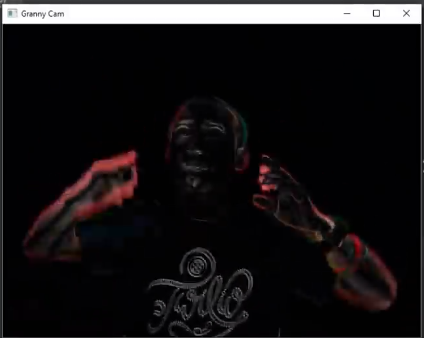

### Grayscale Conversion
To simplify the motion detection process, we convert the absolute difference image to grayscale.

In [24]:
cam = cv2.VideoCapture(1)

while cam.isOpened():

    ret, frame1 = cam.read()
    ret, frame2 = cam.read()

    abs = cv2.absdiff(frame1, frame2)

    # convert abs to gray 
    gray = cv2.cvtColor(abs, cv2.COLOR_RGB2GRAY)

    cv2.imshow('Sec Cam', gray)

    if cv2.waitKey(10) == ord('q'):
        break


cam.release()
cv2.destroyAllWindows()

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


### Gaussian Blur
We apply Gaussian blur to the grayscale image to reduce noise and make it smoother.

In [23]:
cam = cv2.VideoCapture(1)

while cam.isOpened():

    ret, frame1 = cam.read()
    ret, frame2 = cam.read()

    abs = cv2.absdiff(frame1, frame2)

    # convert abs to gray 
    gray = cv2.cvtColor(abs, cv2.COLOR_RGB2GRAY)

    # blur the grayscale 
    blur = cv2.GaussianBlur(gray, (5,5), 0)

    cv2.imshow('Sec Cam', blur)

    if cv2.waitKey(10) == ord('q'):
        break


cam.release()
cv2.destroyAllWindows()

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


### Thresholding
Thresholding helps us focus on regions of interest by converting the blurred image into a binary image.

In [22]:
cam = cv2.VideoCapture(1)

while cam.isOpened():

    ret, frame1 = cam.read()
    ret, frame2 = cam.read()

    abs = cv2.absdiff(frame1, frame2)

    # convert abs to gray 
    gray = cv2.cvtColor(abs, cv2.COLOR_RGB2GRAY)

    # blur the grayscale 
    blur = cv2.GaussianBlur(gray, (5,5), 0)

    # remove excess background noise 
    _, thresh = cv2.threshold(blur, 20, 255, cv2.THRESH_BINARY)

    cv2.imshow('Sec Cam', thresh)

    if cv2.waitKey(10) == ord('q'):
        break


cam.release()
cv2.destroyAllWindows()

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


### Dilation
Dilation is used to fill gaps in the binary image and expand the white regions.

In [21]:
cam = cv2.VideoCapture(1)

while cam.isOpened():

    ret, frame1 = cam.read()
    ret, frame2 = cam.read()

    abs = cv2.absdiff(frame1, frame2)

    # convert abs to gray 
    gray = cv2.cvtColor(abs, cv2.COLOR_RGB2GRAY)

    # blur the grayscale 
    blur = cv2.GaussianBlur(gray, (5,5), 0)

    # remove excess background noise 
    _, thresh = cv2.threshold(blur, 20, 255, cv2.THRESH_BINARY)

    # dilation
    dilated = cv2.dilate(thresh, None, iterations=3)

    cv2.imshow('Sec Cam', dilated)

    if cv2.waitKey(10) == ord('q'):
        break


cam.release()
cv2.destroyAllWindows()

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


now if you chec the output, the white regions look bolder

### Contour Detection
We detect contours in the dilated image to identify areas of motion.

we now want to draw contours around objecxs that are moving. since we already dilated our image, we now want to draw contours around the movement area. this will be captured by retr_tee. then the dimensions of the contours are simplified by  chain_approx_zimple which outputs endpoints of the contours. 
we then call drawContours function to draw contours endpoints on frame1, draw all the contours taht appear using -1, use the color green and its thicknes should be 2

In [20]:
cam = cv2.VideoCapture(1)

while cam.isOpened():

    ret, frame1 = cam.read()
    ret, frame2 = cam.read()

    abs = cv2.absdiff(frame1, frame2)

    # convert abs to gray 
    gray = cv2.cvtColor(abs, cv2.COLOR_RGB2GRAY)

    # blur the grayscale 
    blur = cv2.GaussianBlur(gray, (5,5), 0)

    # remove excess background noise 
    _, thresh = cv2.threshold(blur, 20, 255, cv2.THRESH_BINARY)

    # dilation
    dilated = cv2.dilate(thresh, None, iterations=3)

    # drawing boundaries 
    contours, _ = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(frame1, contours, contourIdx=-1, color=(0, 255, 0), thickness=2)


    cv2.imshow('Sec Cam', frame1)

    if cv2.waitKey(10) == ord('q'):
        break


cam.release()
cv2.destroyAllWindows()

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


this is what yu shd typically see

![Screenshot 2023-09-17 172025.png](<attachment:Screenshot 2023-09-17 172025.png>)
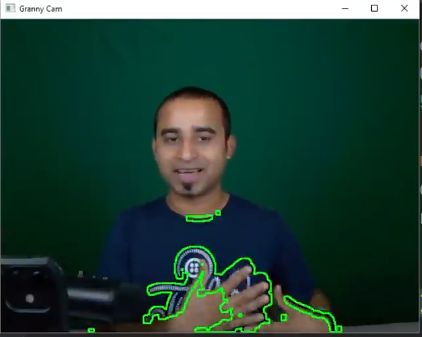

### Rectangle Drawing
Finally, we draw rectangles around objects with significant motion.

In [3]:
cam = cv2.VideoCapture(1)

while cam.isOpened():

    ret, frame1 = cam.read()
    ret, frame2 = cam.read()

    abs = cv2.absdiff(frame1, frame2)

    # convert abs to gray 
    gray = cv2.cvtColor(abs, cv2.COLOR_RGB2GRAY)

    # blur the grayscale 
    blur = cv2.GaussianBlur(gray, (5,5), 0)

    # remove excess background noise 
    _, thresh = cv2.threshold(blur, 20, 255, cv2.THRESH_BINARY)

    # dilation
    dilated = cv2.dilate(thresh, None, iterations=3)

    # drawing boundaries 
    contours, _ = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # cv2.drawContours(frame1, contours, contourIdx=-1, color=(0, 255, 0), thickness=2)

    # make rectangles 
    for c in contours:
        if cv2.contourArea(c) < 5000:
            continue
        x, y, w, h = cv2.boundingRect(c)
        cv2.rectangle(frame1, pt1=(x, y), pt2=(x+w, y+h), color=(0, 255, 0), thickness=2)

    if cv2.waitKey(10) == ord('q'):
        break
    
    cv2.imshow('Sec Cam', frame1)


cam.release()
cv2.destroyAllWindows()